# Project: Image Processing for Object Detection Models

![example image](./000000269314.jpg)

Countless hours of footage have been filmed by hidden cameras for a wildlife documentary. The footage needs to be examined to find out when animals have been captured in the footage. Classifying all captured images based on whether the feature animals could save weeks of work. 

My task is to prepare an image processing pipeline. The pipeline will augment existing datasets of images featuring animals so that an object-detection model can be trained and used on the footage.

Data augmentation involves creating variations of the original images through transformations like rotation, scaling, and equalizing to increase the training dataset's diversity and models' robustness. This technique enriches the dataset without collecting more data, helping models generalize better to new, unseen images.

In this project, I perform image processing operations on five images featuring animals. The output of this project will be a pipeline transforming images to produce augmented datasets.

## Data

The `COCO` (Common Objects in Context) dataset is a dataset designed for training and evaluating computer vision models on a variety of tasks, including object detection. Five images featuring animals have been downloaded from this dataset. 

The list `file_names` is already available and contains the names of the image files available in the current directory.

In [4]:
# Import Matplotlib to read and display images 
import matplotlib.pyplot as plt
# Import the necessary modules from scikit-image for image transformation, and exposure adjustment
from skimage.transform import resize, rotate 
from skimage.exposure import equalize_adapthist

# List of filenames for the images to be processed
file_names = ["000000546829.jpg","000000012062.jpg","000000417085.jpg","000000269314.jpg","000000575357.jpg"]

In [8]:
def image_processing(file_names, size=(250, 250), rotation_angle=0, equalization_clip_limit=None):

    # Initialize an empty list to store images
    images = []
    
    # Loop through each file in the `file_names` list, import the image, resize it and store it in `resized_images`.
    for file in file_names:
        image = plt.imread(file)
        image = resize(image, size)
        images.append(image)

    # Loop through each images `images`, rotate it and replace it.
    for i in range(len(images)):
        rotated_image = rotate(images[i], angle=rotation_angle)
        images[i] = rotated_image
        
    # Loop through each images `images`, equalize it and replace it.
    if equalization_clip_limit:
        for i in range(len(images)):
            equalized_image = equalize_adapthist(images[i],clip_limit=equalization_clip_limit)
            images[i] = equalized_image

    return images

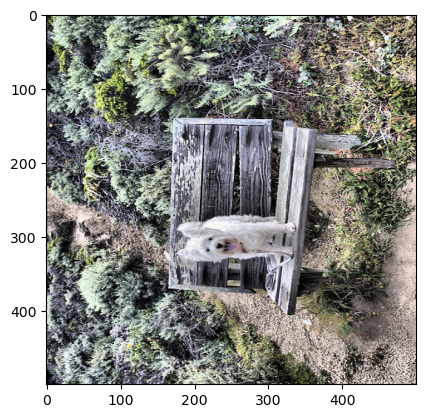

In [10]:
transformed_images = image_processing(file_names,size = (500,500),rotation_angle=90,equalization_clip_limit = 1)

# (optional) Display the last image in the list of augmented images
plt.imshow(transformed_images[0])
plt.show()